## K-Nearest Neighbors (kNN) Classifier

* Tell me who your neighbours are, and I'll tell you who you are!
* K-Nearest Neighbors (kNN) is an algorithm that classifies a data point based on this principle. This means it classifies a given data point according to the classification labels of surrounding data points
* It uses Euclidean distance between the data point and other data points to determine who are its neighbours
* The k represents the number of neighbours to include in the classification problem
* kNN is well suited for classification tasks where the relationship between the features are complex and hard to understand.

In [13]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

In [14]:
xBlue = np.array([0.3,0.5,1,1.4,1.7,2])
yBlue = np.array([1,4.5,2.3,1.9,8.9,4.1])

In [15]:
xRed = np.array([3.3,3.5,4,4.4,5.7,6])
yRed = np.array([7,1.5,6.3,1.9,2.9,7.1])

In [16]:
X = np.array([[0.3,1],[0.5,4.5],[1,2.3],[1.4,1.9],[1.7,8.9],[2,4.1],[3.3,7],[3.5,1.5],[4,6.3],[4.4,1.9],[5.7,2.9],[6,7.1]])
y = np.array([0,0,0,0,0,0,1,1,1,1,1,1]) # 0: blue class, 1: red class

C:\Users\hajat\AppData\Local\Temp\ipykernel_31308\238013945.py:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(xBlue, yBlue, 'ro', color = 'blue')
C:\Users\hajat\AppData\Local\Temp\ipykernel_31308\238013945.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(xRed, yRed, 'ro', color='red')
C:\Users\hajat\AppData\Local\Temp\ipykernel_31308\238013945.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(2,8,'ro',color='green', markersize=10)


(-0.5, 10.0, -0.5, 10.0)

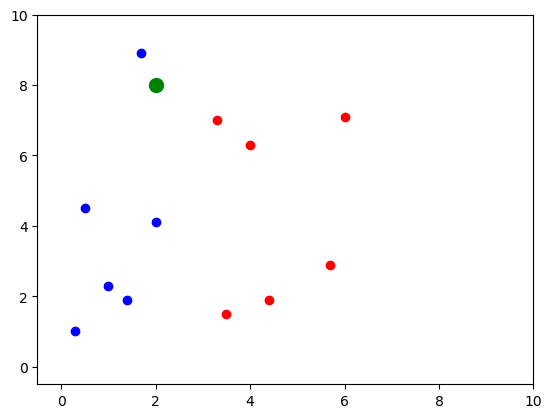

In [17]:
plt.plot(xBlue, yBlue, 'ro', color = 'blue')
plt.plot(xRed, yRed, 'ro', color='red')
plt.plot(2,8,'ro',color='green', markersize=10)
plt.axis([-0.5,10,-0.5,10])

In [18]:
classifier = KNeighborsClassifier(n_neighbors=3) # this is the k value
classifier.fit(X,y)

pred = classifier.predict(np.array([[2,8]]))

if pred == 0:
    print("Data point is blue")
else:
    print("Data point is red")

Data point is red


### Let's apply this to 'real' data!
You can obtain the dataset used in this lecture here: https://www.kaggle.com/rakeshrau/social-network-ads/data. It is a 'categorical dataset to determine whether a user purchased a particular product'.

In [19]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score

def check_NaN(dataframe):
    print("Total NaN:", dataframe.isnull().values.sum())
    print("NaN by column:\n",dataframe.isnull().sum())
    return

In [20]:
data = pd.read_csv("./datasets/Social_Network_Ads.csv")

In [21]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [22]:
check_NaN(data)

Total NaN: 0
NaN by column:
 User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64


This is another way of selecting the features you want where data.features represents your x values, and data.target represents your y values. These are numpy arrays so there is no need to convert them as we did before!

In [23]:
data.features = data[["EstimatedSalary","Age"]]
data.target = data.Purchased

C:\Users\hajat\AppData\Local\Temp\ipykernel_31308\1446196271.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data.features = data[["EstimatedSalary","Age"]]
C:\Users\hajat\AppData\Local\Temp\ipykernel_31308\1446196271.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data.target = data.Purchased


Here is the normalisation step. This is very important as we don't want huge or tiny values to obscure meaning of the data. 

In [24]:
data.features = preprocessing.MinMaxScaler().fit_transform(data.features)

#### kNN is a Lazy Learner!
* Although we define train/test splits, there is no explicity training
* Lazy Learning means there is no explicit training, and no generalisation based on the training data
* kNN keeps all the training data for inference
* Making the predictions on the test data is rather slow (because the distance between a test data point and all the training data points must be calculated)
* kNN uses non-parametric learning: no parameters are to be learned about the data because it makes no assumptions about data distribution

In [25]:
x_train, x_test, y_train, y_test = train_test_split(data.features,data.target, test_size=0.2,random_state=42)

Here, we are finding the optimal k value by using cross_val_score. You can find more info on this function here: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html

In [26]:
k_scores = []

for k in range(1,100):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn,data.features,data.target,cv=10,scoring='accuracy')
    k_scores.append(scores.mean())
    
optimal_k = np.argmax(k_scores)    
print("Optimal k with cross-validation: ", np.argmax(k_scores))  

Optimal k with cross-validation:  12


In [27]:
classifier = KNeighborsClassifier(optimal_k)
classifier.fit(x_train, y_train)
predictions = classifier.predict(x_test)

#### Evaluation using mean squared error and accuracy

In [28]:
print(confusion_matrix(y_test, predictions))

[[48  4]
 [ 2 26]]


In [29]:
print("Accuracy:",str(accuracy_score(y_test, predictions)*100)+"%")

Accuracy: 92.5%


In [30]:
#mean squared error
print("Mean squared error: ",str(np.mean((predictions - y_test) ** 2)*100)+"%")

Mean squared error:  7.5%


### Visualisation

C:\Users\hajat\AppData\Local\Temp\ipykernel_31308\2532632188.py:15: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(xs[ys==j,0],xs[ys==j,1],


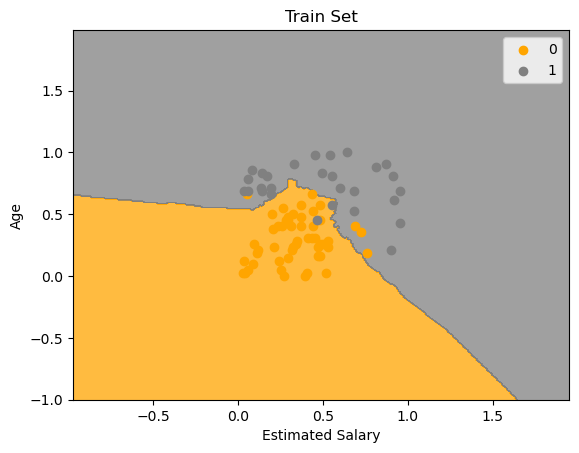

In [33]:
from matplotlib.colors import *

xs, ys = x_test, y_test

X1, X2 = np.meshgrid(np.arange(start = xs[:,0].min() - 1,stop = xs[:,0].max() + 1,step = 0.01),
                     np.arange(start = xs[:,1].min() - 1,stop = xs[:,1].max() + 1,step = 0.01))

plt.contourf(X1,X2, classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
            alpha = 0.75, cmap = ListedColormap(['orange','grey']))

plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())

for i, j in enumerate(np.unique(ys)):
    plt.scatter(xs[ys==j,0],xs[ys==j,1],
                c=ListedColormap(['orange','grey'])(i),label = j)

plt.title('Train Set')
plt.xlabel('Estimated Salary')
plt.ylabel('Age')
plt.legend()
plt.show()

### Exercise
Add the feature 'Gender' to the training set, and see if the model improves?